# Affect of Outliers on Central Tendency Measures 
The short script aims to explore the affect of outliers on Central Tendency Measures

### Central Tendency Measures: 
* Mean: The average of all data points. To find the mean, add up all of the values and divide by the number of observations in your dataset.
* Median: The data point where half of the data lies above and half below it. To find the median, order your data from smallest to largest and then find the data point that has an equal amount of values above it and below it.
* Mode: The most frequently occurring value

When to use the median: Skewed distribution, Continuous data, Ordinal data. When you have ordinal data, the median or mode is usually the best choice. For categorical data, you have to use the mode.

For more info:
* https://online.stat.psu.edu/stat504/node/12/
* https://statisticsbyjim.com/basics/measures-central-tendency-mean-median-mode/

## Step 1: Setup

In [1]:
# Imports
import numpy as np
import seaborn as sns

# To make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

## Step 2: Create and Visual the Data

In [2]:
# https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html

# Create the data set: (mean, std, output shape)
data = np.random.normal(20000, 5000, 1000)
print("First 10 data points: \n", data[:10])

First 10 data points: 
 [22483.57076506 19308.67849414 23238.4426905  27615.14928204
 18829.23312638 18829.31521525 27896.06407754 23837.17364576
 17652.62807033 22712.80021793]


In [3]:
# Check to see if standard deviation of the data matches (at least close) what we set up
print("The standard deviation is", data.std())

The standard deviation is 4893.631038736771


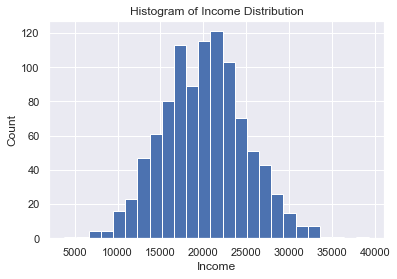

In [4]:
# Set default Seaborn style
sns.set()

# Plot the data
bucket_num = 25
plt.hist(data, bucket_num)
plt.xlabel('Income')
plt.ylabel('Count')
plt.title('Histogram of Income Distribution')
plt.show()

## Step 3: Calculate Central Tendency Measures

### Mean, Median
For a symmetric distribution such as the normal distribution, the mean and the median are the same number (or very close)

In [5]:
# Mean and Median
normalMean = np.mean(data)
normalMedian = np.median(data)

print("The Mean is", normalMean )
print("The Median is", normalMedian )

The Mean is 20096.660279111627
The Median is 20126.50306117444


### Mode
In the continuous data such as the one we are working with, it is unlikely to have for repeated values because there are an infinite number of values between any two values. However, we can find the mode for continuous data by locating the maximum value on a probability distribution plot

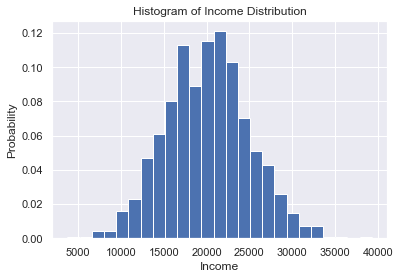

In [6]:
# Calculate for Probability
dataUnique, dataCounts = np.unique(data, return_counts=True);
PMF = dataCounts/data.shape[0];

# https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.hist.html
# Using the "weights" parameter for probability ("density" parameter = probability density)
y, x, _ = plt.hist(dataUnique, bins=bucket_num, weights=PMF)
plt.xlabel('Income')
plt.ylabel('Probability')
plt.title('Histogram of Income Distribution')
plt.show()

In [7]:
# Mode
dataMode = x[np.where(y == y.max())]

print("The largest probability is", y.max(), "with the income bucket/bin", x[np.where(y == y.max())])
print("As the result, the mode is", dataMode )

The largest probability is 0.1210000000000001 with the income bucket/bin [20819.26049339]
As the result, the mode is [20819.26049339]


## Step 4: Calculate Central Tendency Measures with Outliers

In [8]:
# Creating Outliers
data = np.append(data, [50000, 150000, 750000])

In [9]:
# Check outlier in the new data
print("Last 3 values in the data set: ", data[-3:])

Last 3 values in the data set:  [ 50000. 150000. 750000.]


### Mean, Median,  Mode
Based on the mode definition, it value should not be affected in skew distribution because there are only few outliers. 

In [10]:
# Mean and Median
outlierMean = np.mean(data)
outlierMedian = np.median(data)

print("The Mean is", outlierMean)
print("The Median is", outlierMedian)

The Mean is 20983.709151656658
The Median is 20134.429194972654


## Step 5: Evaluate Results
#### Based on the result below, the median is more resistant to outliers because there a so few of them. Extreme values in an extended tail pull the mean away from the center. As the distribution becomes more skewed, the mean is drawn further away from the center. As the result, only use mean as a measure of the central tendency when you have a symmetric distribution.

In [11]:
# Symmetric Distribution
print("The Mean is", normalMean )
print("The Median is", normalMedian )

The Mean is 20096.660279111627
The Median is 20126.50306117444


In [12]:
# Skewed Distribution
print("The Mean is", outlierMean)
print("The Median is", outlierMedian)

The Mean is 20983.709151656658
The Median is 20134.429194972654
